# **Klasifikasi Penyakit Daun Kopi**

Dataset : [dataset daun kopi](https://www.kaggle.com/datasets/gauravduttakiit/coffee-leaf-diseases)

### **Mengimport semua dependensi**

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

### **Mengimport data ke dalam objek dataset tensorflow**
Menggunakan tool splitfolders untuk membagi dataset ke dalam direktori test, validasi, dan training.

`$ pip install split-folders`

`$ split_folders --output dataset --ratio .7 .1 .2 -- ./training/model-leaf/`


In [2]:
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 20

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
)

validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 1164 images belonging to 4 classes.
Found 166 images belonging to 4 classes.
Found 334 images belonging to 4 classes.


In [4]:
train_generator.class_indices

{'miner': 0, 'nodisease': 1, 'phoma': 2, 'rust': 3}

In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['miner', 'nodisease', 'phoma', 'rust']

In [6]:
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.77647066 0.7254902  0.6901961 ]
  [0.77647066 0.7254902  0.6901961 ]
  [0.77647066 0.7254902  0.6901961 ]
  ...
  [0.8235295  0.7803922  0.7725491 ]
  [0.8222027  0.77906543 0.7712223 ]
  [0.82093215 0.7777949  0.76995176]]

 [[0.77647066 0.7254902  0.6901961 ]
  [0.77647066 0.7254902  0.6901961 ]
  [0.77647066 0.7254902  0.6901961 ]
  ...
  [0.8235295  0.7803922  0.7725491 ]
  [0.8220618  0.7789245  0.7710814 ]
  [0.82107306 0.7779358  0.77009267]]

 [[0.77647066 0.7254902  0.6901961 ]
  [0.77647066 0.7254902  0.6901961 ]
  [0.77647066 0.7254902  0.6901961 ]
  ...
  [0.8235295  0.7803922  0.7725491 ]
  [0.82192093 0.7787837  0.77094054]
  [0.8212139  0.77807665 0.7702335 ]]

 ...

 [[0.7670215  0.7160411  0.680747  ]
  [0.7686275  0.71996015 0.6777269 ]
  [0.770938   0.72387916 0.67682034]
  ...
  [0.7960785  0.75294125 0.74509805]
  [0.7960785  0.75294125 0.74509805]
  [0.7960785  0.75294125 0.74509805]]

 [[0.7671624  0.71618193 0.6808878 ]
  [0.7686275  0.720101   0.67744523]


### **Membuat Model**

In [7]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(n_classes, activation='softmax'),
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

### **Menyusun Model**
Menggunakan adam optimizer, SparseCategoricalCrossentropy untuk loss dan accuracy sebagai matrik

In [9]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [10]:
1164/32

36.375

In [11]:
166/32

5.1875

In [12]:
history = model.fit(
    train_generator,
    steps_per_epoch=36,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/20
36/36 [==============================] - 144s 4s/step - loss: 1.3791 - accuracy: 0.2845 - val_loss: 1.3683 - val_accuracy: 0.2812
Epoch 2/20
36/36 [==============================] - 110s 3s/step - loss: 1.3673 - accuracy: 0.3118 - val_loss: 1.3456 - val_accuracy: 0.2875
Epoch 3/20
36/36 [==============================] - 119s 3s/step - loss: 1.2972 - accuracy: 0.3790 - val_loss: 1.0791 - val_accuracy: 0.5562
Epoch 4/20
36/36 [==============================] - 107s 3s/step - loss: 1.1056 - accuracy: 0.4947 - val_loss: 1.0031 - val_accuracy: 0.6125
Epoch 5/20
36/36 [==============================] - 116s 3s/step - loss: 0.9671 - accuracy: 0.5601 - val_loss: 0.9913 - val_accuracy: 0.5437
Epoch 6/20
36/36 [==============================] - 106s 3s/step - loss: 0.9376 - accuracy: 0.5733 - val_loss: 0.8358 - val_accuracy: 0.5750
Epoch 7/20
36/36 [==============================] - 114s 3s/step - loss: 0.8877 - accuracy: 0.5945 - val_loss: 0.8480 - val_accuracy: 0.6313
Epoch 8/20
36

In [13]:
scores = model.evaluate(test_generator)

11/11 [==============================] - 19s 2s/step - loss: 0.1800 - accuracy: 0.9251


In [14]:
scores

[0.17995624244213104, 0.92514967918396]

Skor hanyalah sebuah daftar yang berisi nilai kerugian dan akurasi

### **Memplot Kurva Akurasi dan Kerugian**

In [15]:
history

In [16]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 36}

In [17]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**loss, accuracy, val loss dll adalah daftar python yang berisi nilai loss, akurasi, dll pada akhir setiap epoch**

In [18]:
type(history.history['loss'])

list

In [19]:
len(history.history['loss'])

20

In [20]:
history.history['loss'][:5] # show loss for first 5 epochs

[1.3790985345840454,
 1.3673161268234253,
 1.2971525192260742,
 1.1056245565414429,
 0.9671424627304077]

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

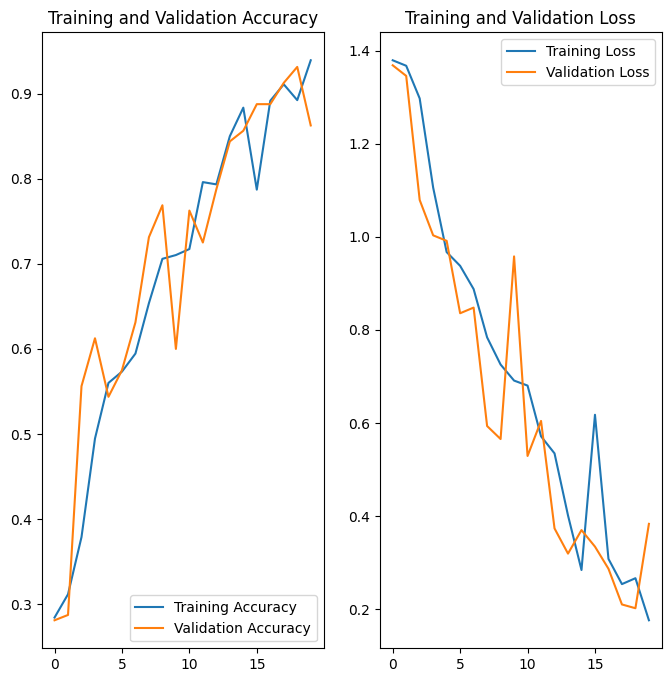

In [22]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Menjalankan prediksi pada gambar sampel**

first image to predict
actual label: nodisease
1/1 [==============================] - 1s 1s/step
predicted label: nodisease


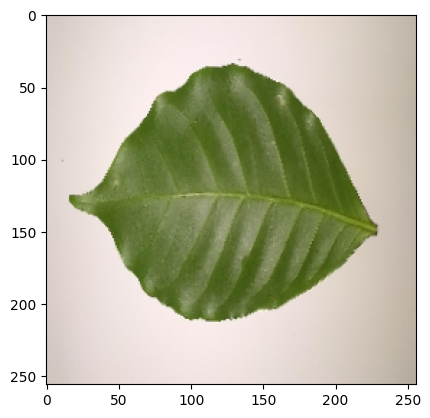

In [23]:
for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

    break

### **Menulis fungsi untuk inferensi**

In [24]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Sekarang jalankan inferensi pada beberapa gambar sampel**

1/1 [==============================] - 0s 53ms/step


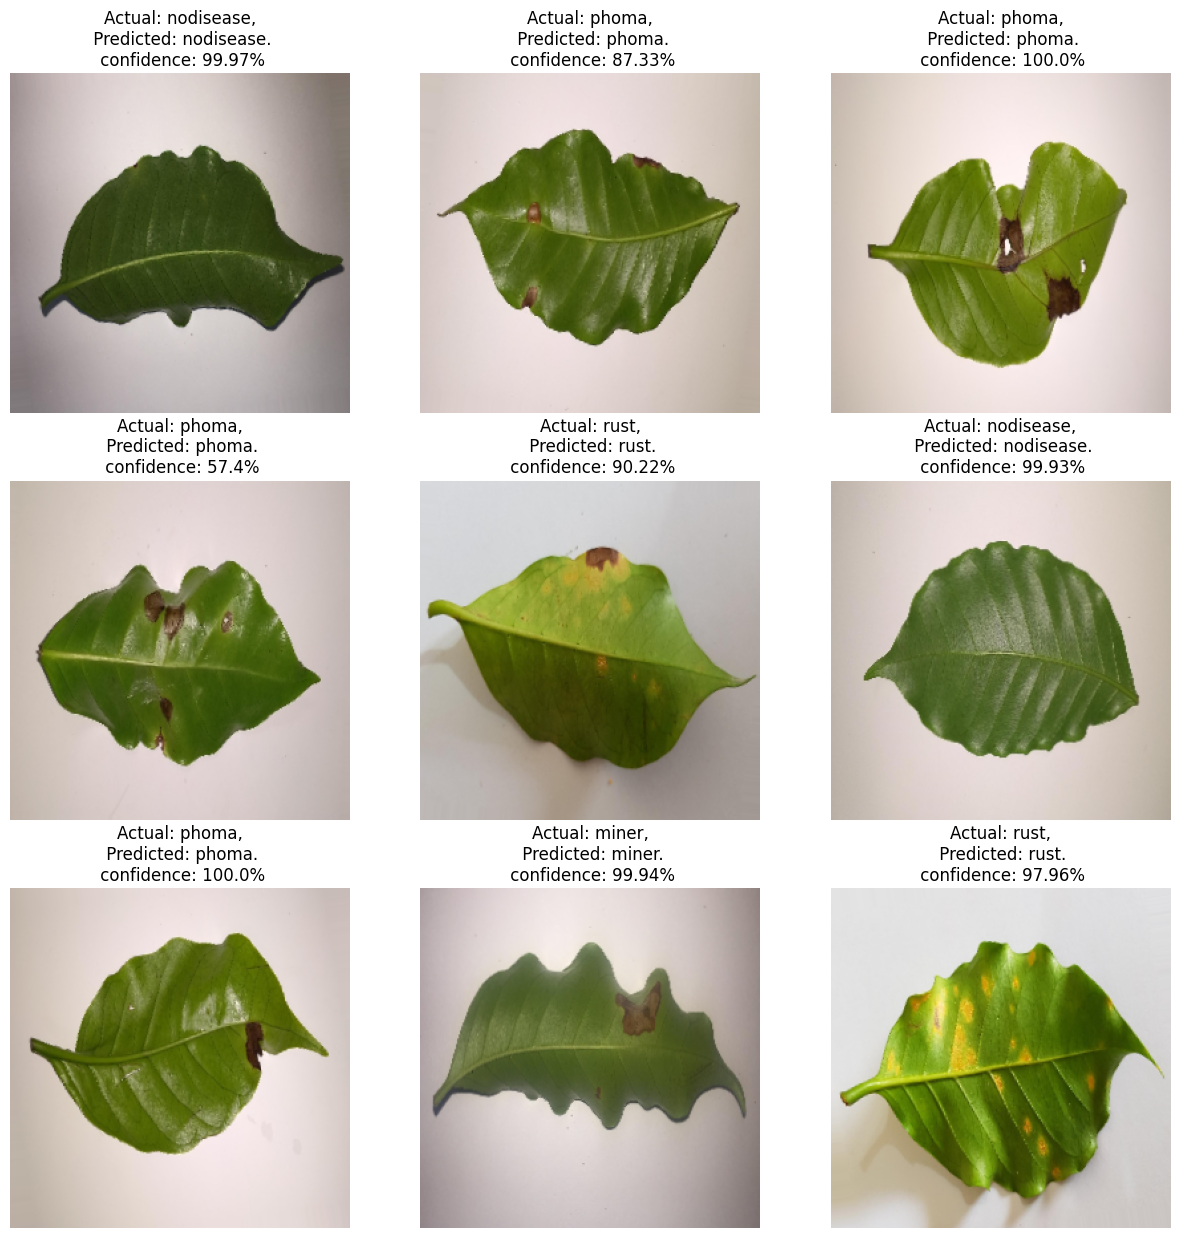

In [25]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n confidence: {confidence}%")

        plt.axis("off")
    break

In [27]:
model.save("../coffee.h5")

### **Menyimpan Model**
Simpan model dalam format h5 sehigga dapat mengconvertnya ke dalam bentuk json

In [29]:
!tensorflowjs_converter \
    --input_format=keras \
    ../coffee.h5 \
    ./tfjs_model